In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("users_data.csv")
cols_to_clean = ["per_capita_income", "yearly_income", "total_debt"]

for col in cols_to_clean:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(r"[^0-9.]", "", regex=True)  # strip $, commas
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")



df.head()

,client-id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,37891,77254,191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,22681,33483,196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,163145,249925,202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,53797,109687,183855,675,1


In [3]:
df["current_age"].describe()

count    2000.000000
mean       45.391500
std        18.414092
min        18.000000
25%        30.000000
50%        44.000000
75%        58.000000
max       101.000000
Name: current_age, dtype: float64

In [4]:
df["gender"].value_counts(normalize="True")*100

gender
Female    50.8
Male      49.2
Name: proportion, dtype: float64

In [5]:
# Common percentiles: 2
percentiles = df["current_age"].quantile([0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9])

df.to_excel("output.xlsx", index=False)



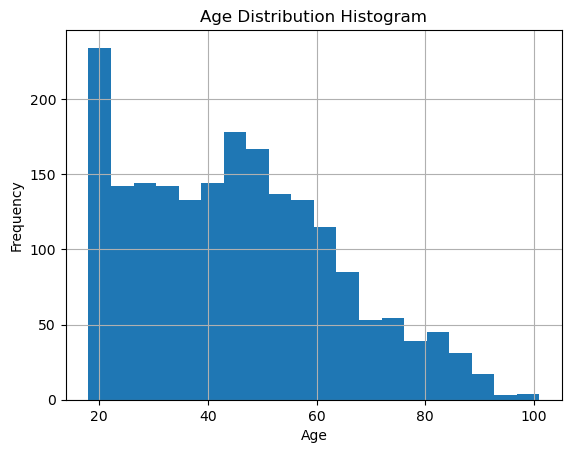

In [6]:
df["current_age"].hist(bins=20)
plt.title("Age Distribution Histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [7]:
# Split ages into quartiles (4 groups)
age_bins = pd.qcut(df["current_age"], q=4)

# Count how many in each bin
counts = age_bins.value_counts().sort_index()
print(counts)


current_age
(17.999, 30.0]    520
(30.0, 44.0]      491
(44.0, 58.0]      506
(58.0, 101.0]     483
Name: count, dtype: int64


In [8]:
# Split ages into quartiles (4 groups)
age_bins = pd.qcut(df["current_age"], q=5)

# Count how many in each bin
counts = age_bins.value_counts().sort_index()
print(counts)


current_age
(17.999, 27.0]    402
(27.0, 39.0]      429
(39.0, 49.0]      371
(49.0, 61.0]      406
(61.0, 101.0]     392
Name: count, dtype: int64


In [9]:
# Define custom bin edges
bins = [0, 30, 45, 60, df["current_age"].max()]

# Define labels for each bin
labels = ["≤30", "31–45", "46–60", "60+"]

# Create the binned age column
df["age_group"] = pd.cut(df["current_age"], bins=bins, labels=labels, include_lowest=True)

# Count how many in each bin
age_counts = df["age_group"].value_counts().sort_index()
print(age_counts)


age_group
≤30      520
31–45    516
46–60    534
60+      430
Name: count, dtype: int64


In [10]:
# Define custom bin edges
bins = [0, 30, 40, 50, 60, df["current_age"].max()]

# Define labels for each bin
labels = ["≤30", "31–40", "41-50", "51–60", "60+"]

# Create the binned age column
df["age_group"] = pd.cut(df["current_age"], bins=bins, labels=labels, include_lowest=True)

# Count how many in each bin
age_counts = df["age_group"].value_counts().sort_index()
print(age_counts)


age_group
≤30      520
31–40    345
41-50    380
51–60    325
60+      430
Name: count, dtype: int64


In [11]:
age_group_mapping = {
    "≤30": 1,
    "31–40": 2,
    "41-50": 3,
    "51–60": 4,
    "60+":5
}
df["age_group_order"] = df["age_group"].map(age_group_mapping)

In [12]:
df["age_group_order"].value_counts().sort_index()

age_group_order
1    520
2    345
3    380
4    325
5    430
Name: count, dtype: int64

In [13]:
df["age_group_order"].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True, categories_dtype=int64)

In [14]:
df["age_group_order"] = df["age_group_order"].astype(int)


In [15]:
df.head(30)

,client-id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,age_group,age_group_order
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,51–60,4
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,37891,77254,191349,701,5,51–60,4
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,22681,33483,196,698,5,60+,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,163145,249925,202328,722,4,60+,5
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,53797,109687,183855,675,1,41-50,3
5,68,42,70,1977,10,Male,58 Birch Lane,41.55,-90.60,20599,41997,0,704,3,41-50,3
6,1075,36,67,1983,12,Female,5695 Fifth Street,38.22,-85.74,25258,51500,102286,672,3,31–40,2
7,1711,26,67,1993,12,Male,1941 Ninth Street,45.51,-122.64,26790,54623,114711,728,1,≤30,1
8,1116,81,66,1938,7,Female,11 Spruce Avenue,40.32,-75.32,26273,42509,2895,755,5,60+,5
9,1752,34,60,1986,1,Female,887 Grant Street,29.97,-92.12,18730,38190,81262,810,1,31–40,2


In [16]:
df.describe()


,client-id,current_age,retirement_age,birth_year,birth_month,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,age_group_order
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,45.391500,66.237500,1973.803000,6.439000,37.389225,-91.554765,23141.928000,45715.882000,63709.694000,709.734500,3.073000,2.900000
std,577.494589,18.414092,3.628867,18.421234,3.565338,5.114324,16.283293,11324.137358,22992.615456,52254.453421,67.221949,1.637379,1.492016
min,0.000000,18.000000,50.000000,1918.000000,1.000000,20.880000,-159.410000,0.000000,1.000000,0.000000,480.000000,1.000000,1.000000
25%,499.750000,30.000000,65.000000,1961.000000,3.000000,33.837500,-97.395000,16824.500000,32818.500000,23986.750000,681.000000,2.000000,1.000000
50%,999.500000,44.000000,66.000000,1975.000000,7.000000,38.250000,-86.440000,20581.000000,40744.500000,58251.000000,711.500000,3.000000,3.000000
75%,1499.250000,58.000000,68.000000,1989.000000,10.000000,41.200000,-80.130000,26286.000000,52698.500000,89070.500000,753.000000,4.000000,4.000000
max,1999.000000,101.000000,79.000000,2002.000000,12.000000,61.200000,-68.670000,163145.000000,307018.000000,516263.000000,850.000000,9.000000,5.000000


In [17]:
# To get the dtypes for each column, use df.dtypes
print(df.dtypes)



client-id               int64
current_age             int64
retirement_age          int64
birth_year              int64
birth_month             int64
gender                 object
address                object
latitude              float64
longitude             float64
per_capita_income       int64
yearly_income           int64
total_debt              int64
credit_score            int64
num_credit_cards        int64
age_group            category
age_group_order         int64
dtype: object


In [18]:
df["age_group"].unique()

['51–60', '60+', '41-50', '31–40', '≤30']
Categories (5, object): ['≤30' < '31–40' < '41-50' < '51–60' < '60+']

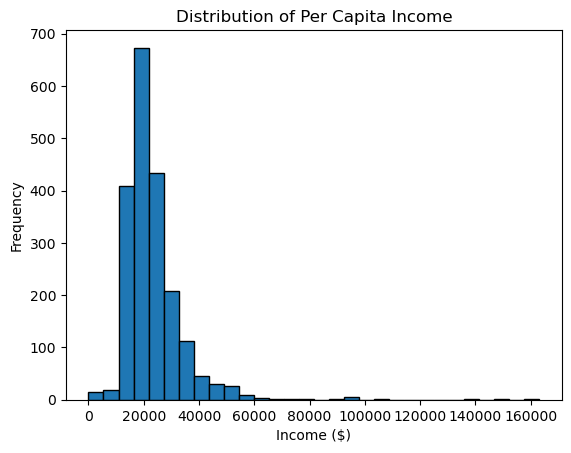

In [19]:
df["per_capita_income"].plot(kind="hist", bins=30, edgecolor="black")
plt.title("Distribution of Per Capita Income")
plt.xlabel("Income ($)")
plt.show()

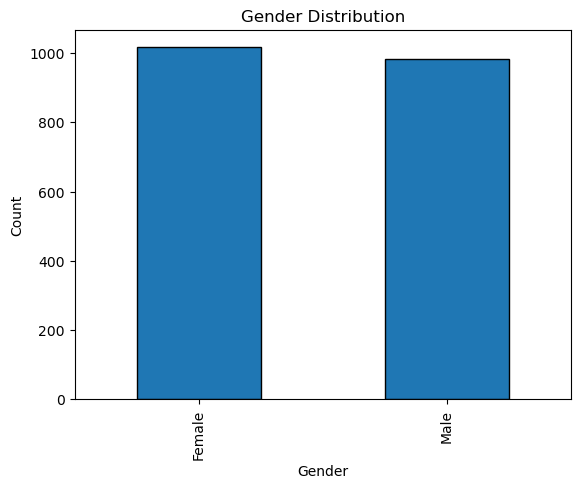

In [20]:
# Fairly even distribution of age
df["gender"].value_counts().plot(kind="bar", edgecolor="black")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


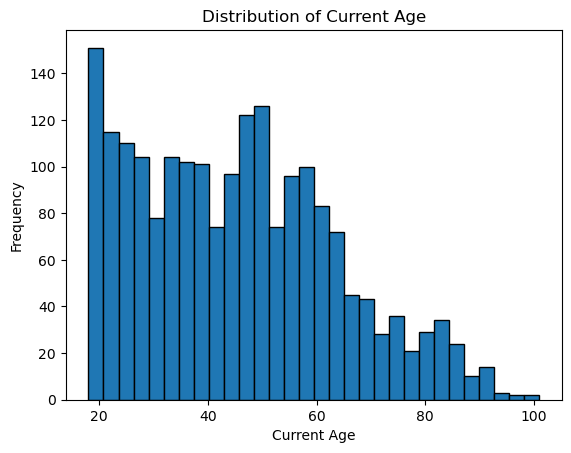

In [21]:
df["current_age"].plot(kind="hist", bins=30, edgecolor="black")
plt.title("Distribution of Current Age")
plt.xlabel("Current Age")
plt.show()

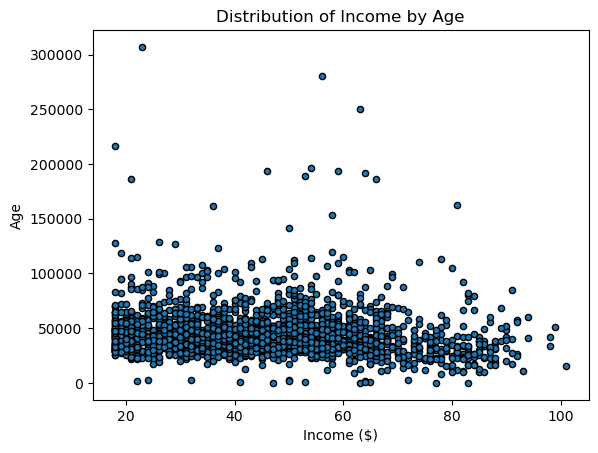

In [22]:
df.plot(kind="scatter", y="yearly_income", x="current_age", edgecolor="black")
plt.title("Distribution of Income by Age")
plt.xlabel("Income ($)")
plt.ylabel("Age")
plt.show()


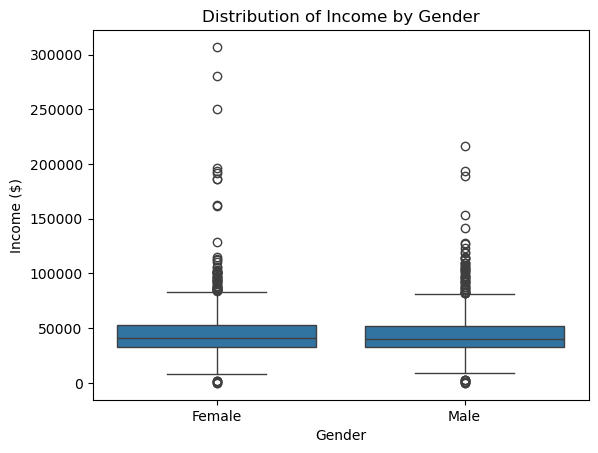

In [23]:
sns.boxplot(x="gender", y="yearly_income", data=df)
plt.title("Distribution of Income by Gender")
plt.xlabel("Gender")
plt.ylabel("Income ($)")
plt.show()




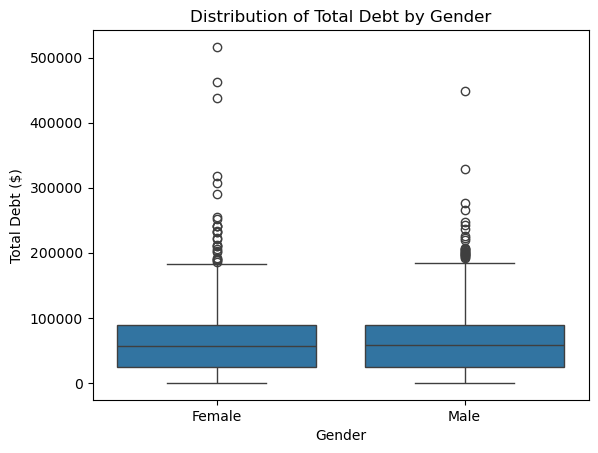

In [24]:
sns.boxplot(x="gender", y="total_debt", data=df)
plt.title("Distribution of Total Debt by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Debt ($)")
plt.show()

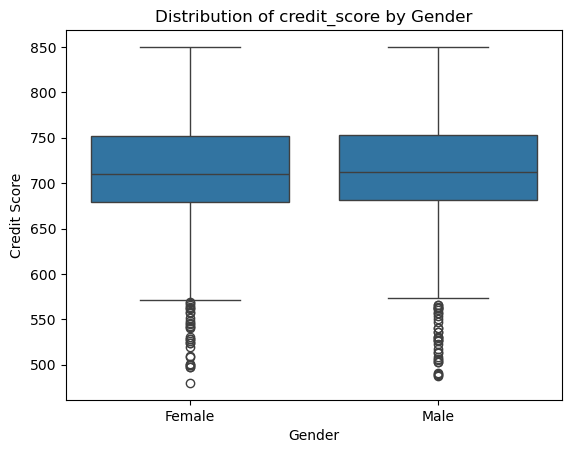

In [25]:
sns.boxplot(x="gender", y="credit_score", data=df)
plt.title("Distribution of credit_score by Gender")
plt.xlabel("Gender")
plt.ylabel("Credit Score")
plt.show()


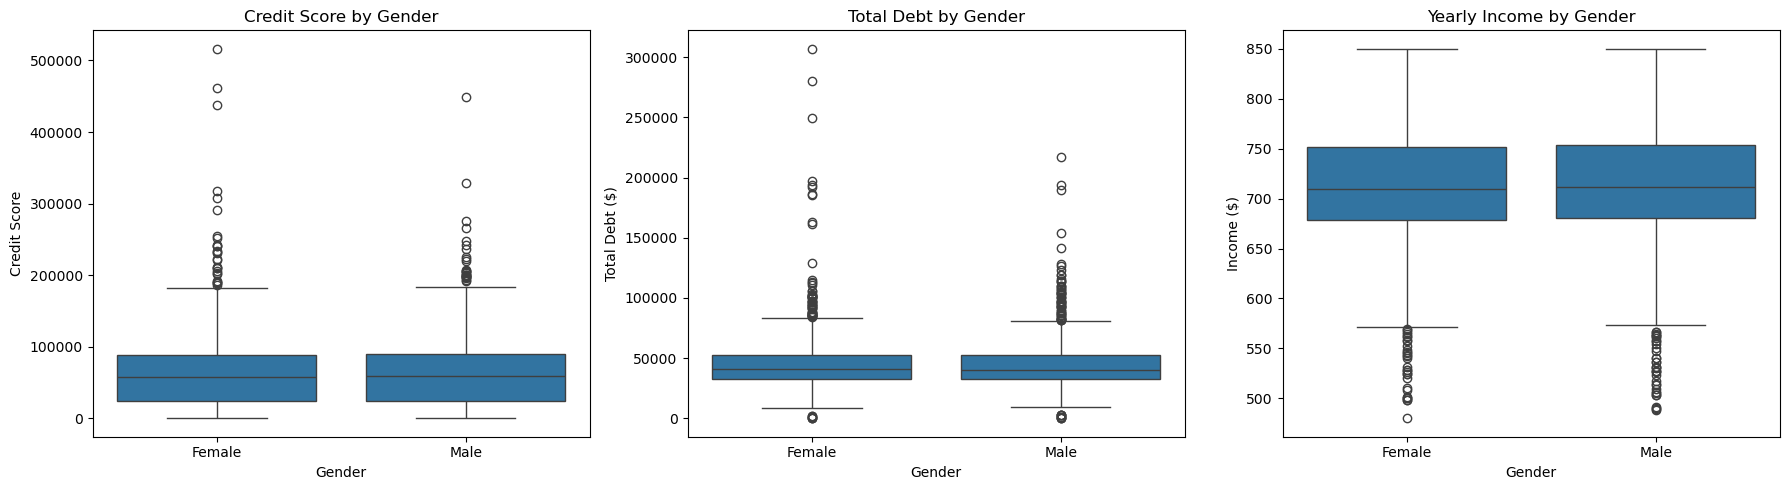

In [26]:
# Create a row of 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# First boxplot: Total Debt
sns.boxplot(x="gender", y="total_debt", data=df, ax=axes[0])
axes[1].set_title("Total Debt by Gender")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Total Debt ($)")

# Second boxplot: Yearly Income
sns.boxplot(x="gender", y="yearly_income", data=df, ax=axes[1])
axes[2].set_title("Yearly Income by Gender")
axes[2].set_xlabel("Gender")
axes[2].set_ylabel("Income ($)")

# Third boxplot: Credit Score
sns.boxplot(x="gender", y="credit_score", data=df, ax=axes[2])
axes[0].set_title("Credit Score by Gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Credit Score")

# Adjust layout
plt.tight_layout()
plt.show()


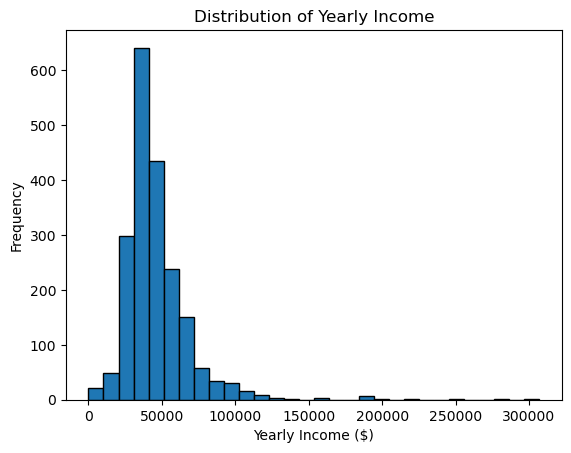

In [27]:
df["yearly_income"].plot(kind="hist", bins=30, edgecolor="black")
plt.title("Distribution of Yearly Income")
plt.xlabel("Yearly Income ($)")
plt.show()

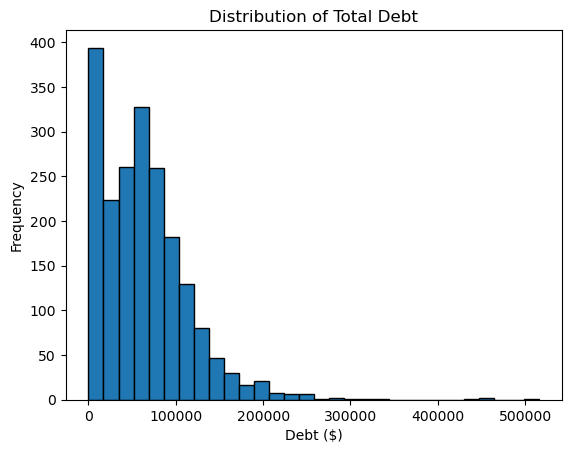

In [28]:
df["total_debt"].plot(kind="hist", bins=30, edgecolor="black")
plt.title("Distribution of Total Debt")
plt.xlabel("Debt ($)")
plt.show()

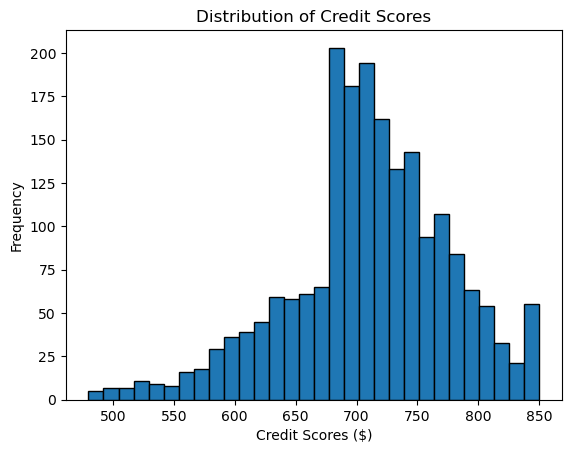

In [29]:
df["credit_score"].plot(kind="hist", bins=30, edgecolor="black")
plt.title("Distribution of Credit Scores")
plt.xlabel("Credit Scores ($)")
plt.show()

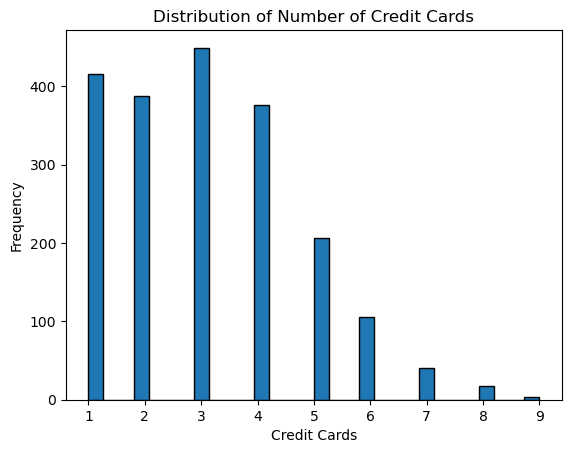

In [30]:
df["num_credit_cards"].plot(kind="hist", bins=30, edgecolor="black")
plt.title("Distribution of Number of Credit Cards")
plt.xlabel("Credit Cards")
plt.show()

In [31]:
df["num_credit_cards"].value_counts()

num_credit_cards
3    449
1    416
2    388
4    376
5    206
6    105
7     40
8     17
9      3
Name: count, dtype: int64

In [32]:

# Define mapping for numeric conversion
mapping = {
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    "5-9": 5,
    "10+": 10
}

df["credit_band_cards"] = df["num_credit_cards"].apply(credit_band_cards)
df["credit_band_cards_num"] = df["credit_band_cards"].map(mapping).astype(int)

print(df["credit_band_cards"].dtype)       # object (mixed ints/strings)
print(df["credit_band_cards_num"].dtype)   # int64


NameError: name 'credit_band_cards' is not defined

In [ ]:
df.describe(include="all")


,client-id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,age_group,age_group_order,credit_band_cards,credit_band_cards_num
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000,2000.000000,2000.0,2000.00000
unique,NaN,NaN,NaN,NaN,NaN,2,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,5.0,NaN
top,NaN,NaN,NaN,NaN,NaN,Female,506 Washington Lane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,≤30,NaN,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,1016,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,520,NaN,449.0,NaN
mean,999.500000,45.391500,66.237500,1973.803000,6.439000,NaN,NaN,37.389225,-91.554765,23141.928000,45715.882000,63709.694000,709.734500,3.073000,NaN,2.900000,NaN,2.94900
std,577.494589,18.414092,3.628867,18.421234,3.565338,NaN,NaN,5.114324,16.283293,11324.137358,22992.615456,52254.453421,67.221949,1.637379,NaN,1.492016,NaN,1.39799
min,0.000000,18.000000,50.000000,1918.000000,1.000000,NaN,NaN,20.880000,-159.410000,0.000000,1.000000,0.000000,480.000000,1.000000,NaN,1.000000,NaN,1.00000
25%,499.750000,30.000000,65.000000,1961.000000,3.000000,NaN,NaN,33.837500,-97.395000,16824.500000,32818.500000,23986.750000,681.000000,2.000000,NaN,1.000000,NaN,2.00000
50%,999.500000,44.000000,66.000000,1975.000000,7.000000,NaN,NaN,38.250000,-86.440000,20581.000000,40744.500000,58251.000000,711.500000,3.000000,NaN,3.000000,NaN,3.00000
75%,1499.250000,58.000000,68.000000,1989.000000,10.000000,NaN,NaN,41.200000,-80.130000,26286.000000,52698.500000,89070.500000,753.000000,4.000000,NaN,4.000000,NaN,4.00000


In [ ]:
# Statistical testing: Gender

In [ ]:
# No difference gender vs credit score
male_amounts = df.loc[df["gender"] == "Male", "credit_score"]
female_amounts = df.loc[df["gender"] == "Female", "credit_score"]
t_stat, p_val = stats.ttest_ind(male_amounts, female_amounts, nan_policy="omit")
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
print("Male mean:", male_amounts.mean())
print("Female mean:", female_amounts.mean())
print("Male std:", male_amounts.std())
print("Female std:", female_amounts.std())




T-statistic: 0.380, p-value: 0.704
Male mean: 710.3150406504066
Female mean: 709.1722440944882
Male std: 66.85891324394312
Female std: 67.59985758928845


In [ ]:
# No difference gender x number of credit cards
male_amounts = df.loc[df["gender"] == "Male", "num_credit_cards"]
female_amounts = df.loc[df["gender"] == "Female", "num_credit_cards"]
t_stat, p_val = stats.ttest_ind(male_amounts, female_amounts, nan_policy="omit")
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
print("Male mean:", male_amounts.mean())
print("Female mean:", female_amounts.mean())
print("Male std:", male_amounts.std())
print("Female std:", female_amounts.std())


T-statistic: -0.460, p-value: 0.646
Male mean: 3.055894308943089
Female mean: 3.0895669291338583
Male std: 1.60045956428001
Female std: 1.6729812949492486


In [ ]:
print(df["per_capita_income"].unique()[:20])



[ 29278  37891  22681 163145  53797  20599  25258  26790  26273  18730
  27548  22427  33914  20325  10059  11342  17898  21950  26481  17460]


In [ ]:
df["gender_encoded"] = df["gender"].map({"Male": 0, "Female": 1})


In [ ]:
df["gender_encoded"].dtype

dtype('int64')

In [ ]:
print(df.dtypes)

client-id                   int64
current_age                 int64
retirement_age              int64
birth_year                  int64
birth_month                 int64
gender                     object
address                    object
latitude                  float64
longitude                 float64
per_capita_income           int64
yearly_income               int64
total_debt                  int64
credit_score                int64
num_credit_cards            int64
age_group                category
age_group_order             int64
credit_band_cards          object
credit_band_cards_num       int64
gender_encoded              int64
dtype: object


In [ ]:
print(df[cols_to_clean].dtypes)       # should all be float64
print(df[cols_to_clean].head())       # should show numbers or NaN
print(df[cols_to_clean].describe())   # should show proper stats


per_capita_income    int64
yearly_income        int64
total_debt           int64
dtype: object
   per_capita_income  yearly_income  total_debt
0              29278          59696      127613
1              37891          77254      191349
2              22681          33483         196
3             163145         249925      202328
4              53797         109687      183855
       per_capita_income  yearly_income     total_debt
count        2000.000000    2000.000000    2000.000000
mean        23141.928000   45715.882000   63709.694000
std         11324.137358   22992.615456   52254.453421
min             0.000000       1.000000       0.000000
25%         16824.500000   32818.500000   23986.750000
50%         20581.000000   40744.500000   58251.000000
75%         26286.000000   52698.500000   89070.500000
max        163145.000000  307018.000000  516263.000000


In [ ]:
# No difference gender vs Yearly Income
male_amounts = df.loc[df["gender"] == "Male", "yearly_income"]
female_amounts = df.loc[df["gender"] == "Female", "yearly_income"]

t_stat, p_val = stats.ttest_ind(male_amounts, female_amounts, nan_policy="omit")
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
print("Male mean:", male_amounts.mean())
print("Female mean:", female_amounts.mean())
print("Male std:", male_amounts.std())
print("Female std:", female_amounts.std())


T-statistic: -0.657, p-value: 0.511
Male mean: 45372.63821138212
Female mean: 46048.31496062992
Male std: 21081.212529364693
Female std: 24709.17413521836


In [ ]:
# No difference gender vs total debt
male_amounts = df.loc[df["gender"] == "Male", "total_debt"]
female_amounts = df.loc[df["gender"] == "Female", "total_debt"]

t_stat, p_val = stats.ttest_ind(male_amounts, female_amounts, nan_policy="omit")
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
print("Male mean:", male_amounts.mean())
print("Female mean:", female_amounts.mean())
print("Male std:", male_amounts.std())
print("Female std:", female_amounts.std())


T-statistic: 0.340, p-value: 0.734
Male mean: 64113.775406504064
Female mean: 63318.339566929135
Male std: 50319.624827361295
Female std: 54084.31161862868


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   client-id              2000 non-null   int64   
 1   current_age            2000 non-null   int64   
 2   retirement_age         2000 non-null   int64   
 3   birth_year             2000 non-null   int64   
 4   birth_month            2000 non-null   int64   
 5   gender                 2000 non-null   object  
 6   address                2000 non-null   object  
 7   latitude               2000 non-null   float64 
 8   longitude              2000 non-null   float64 
 9   per_capita_income      2000 non-null   int64   
 10  yearly_income          2000 non-null   int64   
 11  total_debt             2000 non-null   int64   
 12  credit_score           2000 non-null   int64   
 13  num_credit_cards       2000 non-null   int64   
 14  age_group              2000 non-null   c

In [ ]:
numeric_cols = df.select_dtypes(include="number").columns
print(numeric_cols)


Index(['client-id', 'current_age', 'retirement_age', 'birth_year',
       'birth_month', 'latitude', 'longitude', 'per_capita_income',
       'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards',
       'age_group_order', 'credit_band_cards_num', 'gender_encoded'],
      dtype='object')


In [ ]:
corr_matrix = df.corr(numeric_only=True)
print("Rows:", corr_matrix.index.tolist())
print("Columns:", corr_matrix.columns.tolist())


Rows: ['client-id', 'current_age', 'retirement_age', 'birth_year', 'birth_month', 'latitude', 'longitude', 'per_capita_income', 'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards', 'age_group_order', 'credit_band_cards_num', 'gender_encoded']
Columns: ['client-id', 'current_age', 'retirement_age', 'birth_year', 'birth_month', 'latitude', 'longitude', 'per_capita_income', 'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards', 'age_group_order', 'credit_band_cards_num', 'gender_encoded']


In [ ]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
print(corr_matrix)



                       client-id  current_age  retirement_age  birth_year  \
client-id               1.000000     0.009801       -0.038729   -0.009865   
current_age             0.009801     1.000000        0.004814   -0.999769   
retirement_age         -0.038729     0.004814        1.000000   -0.005548   
birth_year             -0.009865    -0.999769       -0.005548    1.000000   
birth_month             0.000663     0.008117        0.019351   -0.022729   
latitude                0.016409    -0.032878       -0.004381    0.032943   
longitude              -0.027401    -0.009111       -0.014067    0.008900   
per_capita_income       0.041258    -0.009054        0.004605    0.008968   
yearly_income           0.033880    -0.114316        0.021506    0.113853   
total_debt              0.046944    -0.315443       -0.043371    0.315195   
credit_score           -0.013724    -0.005468        0.172668    0.006187   
num_credit_cards       -0.014828     0.484189        0.158896   -0.484439   

In [ ]:
import scipy.stats as stats

# Group debt by card count
groups = [group["total_debt"].values 
          for _, group in df.groupby("num_credit_cards")]

f_stat, p_value = stats.f_oneway(*groups)
print("F-statistic:", f_stat)
print("p-value:", p_value)




F-statistic: 14.095239866750552
p-value: 4.0897888884423e-20


In [ ]:
import statsmodels.api as sm

X = df["credit_band_cards_num"]
y = df["total_debt"]

X = sm.add_constant(X)  # add intercept
model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_debt   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     94.09
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           9.02e-22
Time:                        15:04:45   Log-Likelihood:                -24519.
No. Observations:                2000   AIC:                         4.904e+04
Df Residuals:                    1998   BIC:                         4.905e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  8.709e+04   2666.881     32.655      0.000    8.19e+04    9.23e+04
credit_band_cards_num -7926.9566    817.201     -9.700      0.000   -9529.612   -6324.302
==============================================================================
Omnibus:                      911.159   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7987.995
Skew:                           1.931   Prob(JB):                         0.00
Kurtosis:                      11.997   Cond. No.                         8.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X = df[["credit_band_cards_num", "yearly_income", "credit_score"]]
X = sm.add_constant(X)
model = sm.OLS(df["total_debt"], X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             total_debt   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     349.5
Date:                Tue, 09 Dec 2025   Prob (F-statistic):          2.19e-182
Time:                        15:05:26   Log-Likelihood:                -24143.
No. Observations:                2000   AIC:                         4.829e+04
Df Residuals:                    1996   BIC:                         4.832e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.087e+

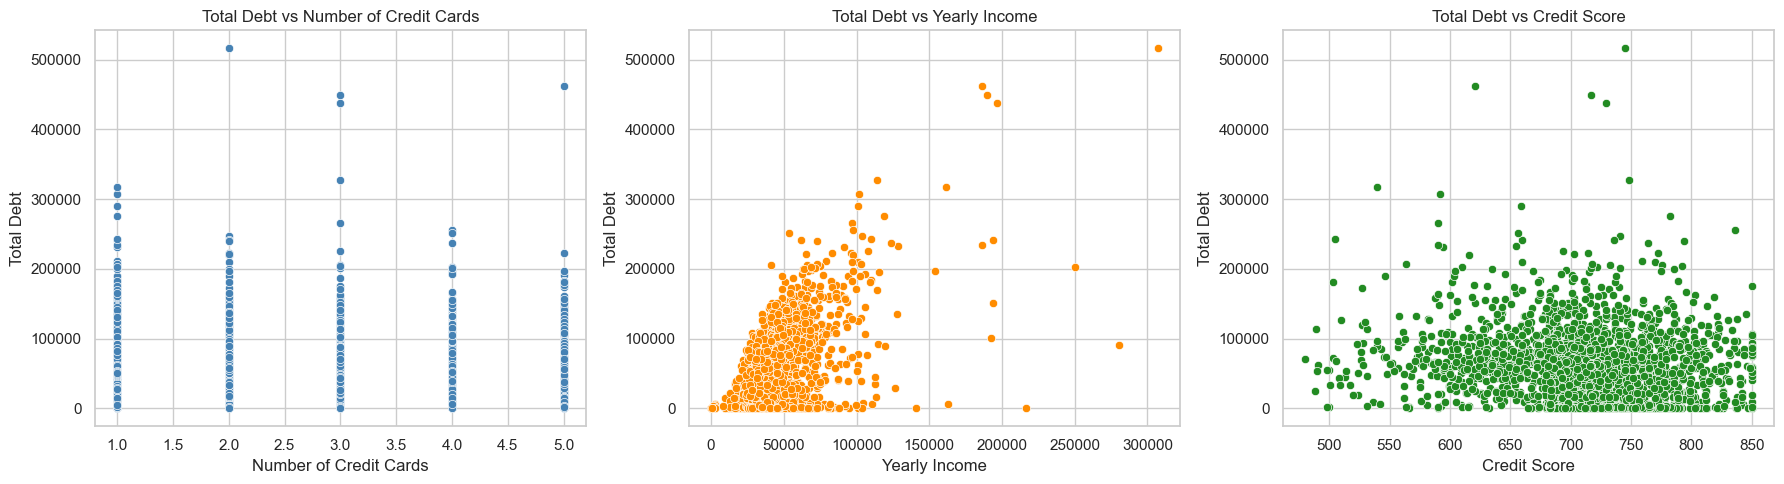

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create 1x3 subplot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatterplot: Debt vs Number of Credit Cards
sns.scatterplot(x="credit_band_cards_num", y="total_debt", data=df, ax=axes[0], color="steelblue")
axes[0].set_title("Total Debt vs Number of Credit Cards")
axes[0].set_xlabel("Number of Credit Cards")
axes[0].set_ylabel("Total Debt")

# Scatterplot: Debt vs Yearly Income
sns.scatterplot(x="yearly_income", y="total_debt", data=df, ax=axes[1], color="darkorange")
axes[1].set_title("Total Debt vs Yearly Income")
axes[1].set_xlabel("Yearly Income")
axes[1].set_ylabel("Total Debt")

# Scatterplot: Debt vs Credit Score
sns.scatterplot(x="credit_score", y="total_debt", data=df, ax=axes[2], color="forestgreen")
axes[2].set_title("Total Debt vs Credit Score")
axes[2].set_xlabel("Credit Score")
axes[2].set_ylabel("Total Debt")

plt.tight_layout()
plt.show()



In [ ]:
df.columns.to_list()

['client-id',
 'current_age',
 'retirement_age',
 'birth_year',
 'birth_month',
 'gender',
 'address',
 'latitude',
 'longitude',
 'per_capita_income',
 'yearly_income',
 'total_debt',
 'credit_score',
 'num_credit_cards',
 'age_group',
 'age_group_order',
 'credit_band_cards',
 'credit_band_cards_num',
 'gender_encoded',
 'credit_score_group']

In [ ]:
bins = [300, 670, 740, 800, 851]  
labels = ["Poor/Fair", "Good", "Very_Good", "Exceptional"]

df["credit_score_group"] = pd.cut(df["credit_score"], bins=bins, labels=labels, right=False)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit two-way ANOVA model
model = ols("total_debt ~ C(credit_score_group) + C(gender) + C(credit_score_group):C(gender)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                                       sum_sq      df          F        PR(>F)
C(credit_score_group)            1.049097e+11     3.0  13.054259  1.920535e-08
C(gender)                        5.733870e+08     1.0   0.214045  6.436656e-01
C(credit_score_group):C(gender)  1.690643e+10     3.0   2.103723  9.777373e-02
Residual                         5.336193e+12  1992.0        NaN           NaN


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df["total_debt"],
                          groups=df["credit_score_group"],
                          alpha=0.05)
print(tukey)


         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
   group1     group2    meandiff  p-adj     lower      upper    reject
----------------------------------------------------------------------
Exceptional      Good   1620.9616 0.9825  -9598.0713 12839.9944  False
Exceptional Poor/Fair  19076.8872 0.0003   6905.0319 31248.7425   True
Exceptional Very_Good   1752.2983  0.982 -10257.2801 13761.8767  False
       Good Poor/Fair  17455.9256    0.0   9685.4616 25226.3897   True
       Good Very_Good    131.3367    1.0  -7382.3856   7645.059  False
  Poor/Fair Very_Good -17324.5889    0.0  -26198.336 -8450.8418   True
----------------------------------------------------------------------


credit_score_group
Poor/Fair      65919.0
Good           54406.0
Very_Good      53954.0
Exceptional    56890.0
Name: total_debt, dtype: float64


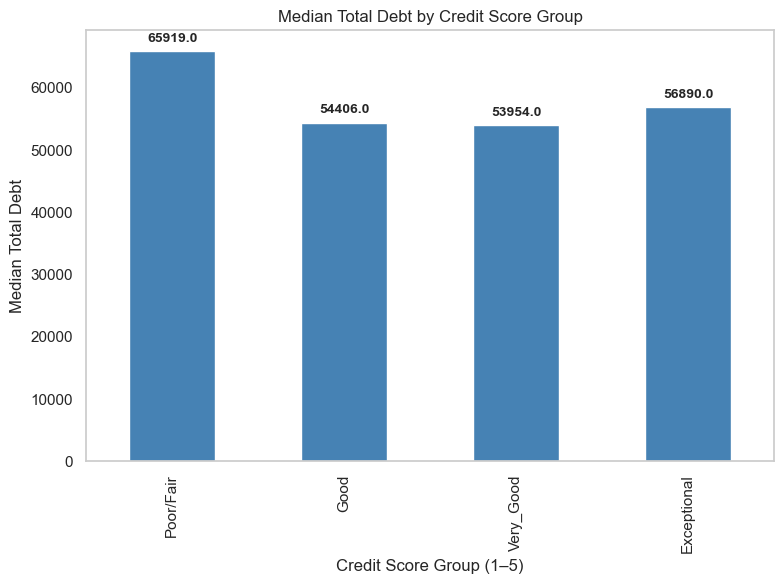

In [ ]:
# Calculate mean debt by credit score group
debt_medians = df.groupby("credit_score_group")["total_debt"].median().round(0)
print(debt_medians)

# Create figure and axis
fig, ax = plt.subplots(figsize=(8,6))

# Plot bar chart
bars = debt_medians.plot(kind="bar", color="steelblue", ax=ax)

# Customize chart
ax.set_title("Median Total Debt by Credit Score Group")
ax.set_xlabel("Credit Score Group (1–5)")
ax.set_ylabel("Median Total Debt")
ax.grid(False)
ax.set_facecolor("white")

# Add value labels on top of each bar
for i, v in enumerate(debt_medians):
    ax.text(i, v + 1000, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()




In [ ]:
df["credit_score_group"].value_counts()

credit_score_group
Good           931
Very_Good      474
Poor/Fair      429
Exceptional    166
Name: count, dtype: int64

In [ ]:
df["credit_score_group"].value_counts()

credit_score_group
Good           931
Very_Good      474
Poor/Fair      429
Exceptional    166
Name: count, dtype: int64

num_credit_cards
1    82516.0
2    67534.0
3    61056.0
4    57344.0
5    53740.0
6    47172.0
7    34062.0
8    17404.0
9    77338.0
Name: total_debt, dtype: float64


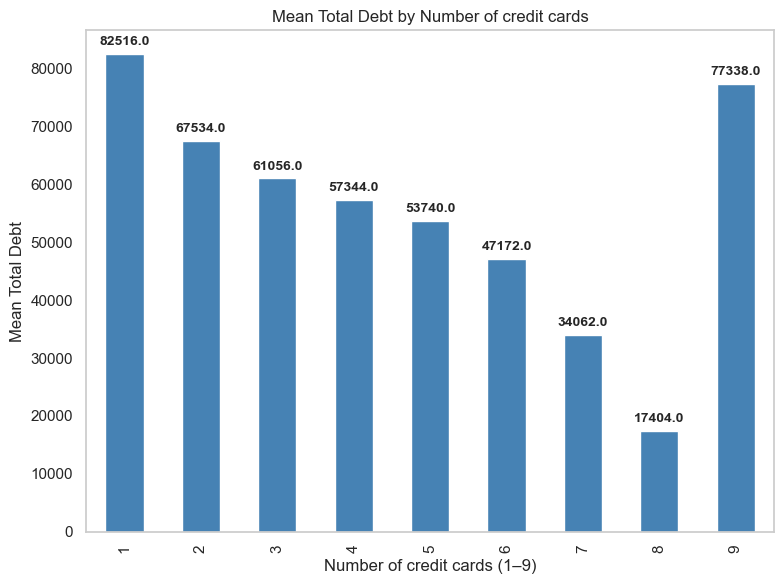

In [ ]:
# Calculate mean debt by credit score group
debt_means = df.groupby("num_credit_cards")["total_debt"].mean().round(0)
print(debt_means)

# Create figure and axis
fig, ax = plt.subplots(figsize=(8,6))

# Plot bar chart
bars = debt_means.plot(kind="bar", color="steelblue", ax=ax)

# Customize chart
ax.set_title("Mean Total Debt by Number of credit cards")
ax.set_xlabel("Number of credit cards (1–9)")
ax.set_ylabel("Mean Total Debt")
ax.grid(False)
ax.set_facecolor("white")

# Add value labels on top of each bar
for i, v in enumerate(debt_means):
    ax.text(i, v + 1000, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


gender
Female    63318.0
Male      64114.0
Name: total_debt, dtype: float64


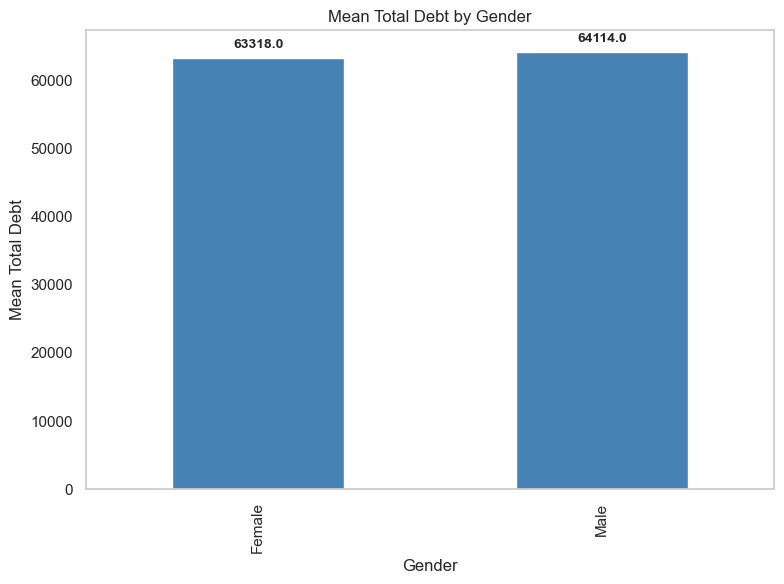

In [ ]:
# Calculate mean debt by gender
debt_means = df.groupby("gender")["total_debt"].mean().round(0)
print(debt_means)

# Create figure and axis
fig, ax = plt.subplots(figsize=(8,6))

# Plot bar chart
bars = debt_means.plot(kind="bar", color="steelblue", ax=ax)

# Customize chart
ax.set_title("Mean Total Debt by Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Mean Total Debt")
ax.grid(False)
ax.set_facecolor("white")

# Add value labels on top of each bar
for i, v in enumerate(debt_means):
    ax.text(i, v + 1000, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


age_group
≤30      75856.0
31–40    73242.0
41-50    64968.0
51–60    76086.0
60+      30907.0
Name: total_debt, dtype: float64


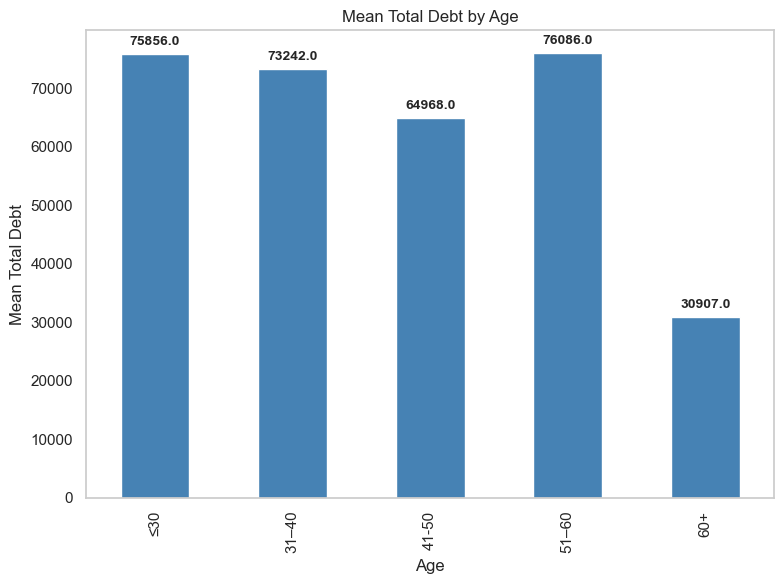

In [ ]:
# Calculate mean debt by age bands
debt_means = df.groupby("age_group")["total_debt"].mean().round(0)
print(debt_means)

# Create figure and axis
fig, ax = plt.subplots(figsize=(8,6))

# Plot bar chart
bars = debt_means.plot(kind="bar", color="steelblue", ax=ax)

# Customize chart
ax.set_title("Mean Total Debt by Age")
ax.set_xlabel("Age")
ax.set_ylabel("Mean Total Debt")
ax.grid(False)
ax.set_facecolor("white")

# Add value labels on top of each bar
for i, v in enumerate(debt_means):
    ax.text(i, v + 1000, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

age_group
≤30      67558.0
31–40    64583.0
41-50    62485.0
51–60    66559.0
60+      16361.0
Name: total_debt, dtype: float64


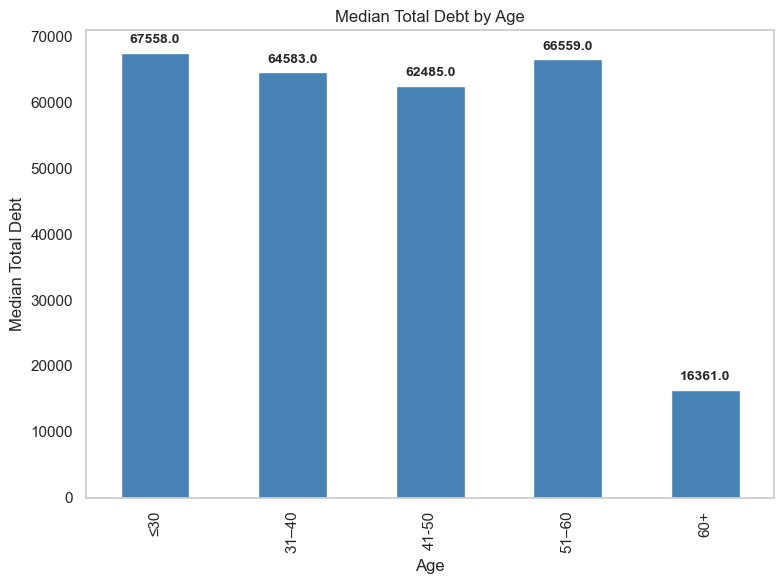

In [ ]:
# Calculate median debt by age bands
debt_medians = df.groupby("age_group")["total_debt"].median().round(0)
print(debt_medians)

# Create figure and axis
fig, ax = plt.subplots(figsize=(8,6))

# Plot bar chart
bars = debt_medians.plot(kind="bar", color="steelblue", ax=ax)

# Customize chart
ax.set_title("Median Total Debt by Age")
ax.set_xlabel("Age")
ax.set_ylabel("Median Total Debt")
ax.grid(False)
ax.set_facecolor("white")

# Add value labels on top of each bar
for i, v in enumerate(debt_medians):
    ax.text(i, v + 1000, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit model
model = ols("total_debt ~ C(age_group)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                    sum_sq      df         F        PR(>F)
C(age_group)  6.211239e+11     4.0  64.04231  5.305888e-51
Residual      4.837201e+12  1995.0       NaN           NaN


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Run Tukey HSD post-hoc test
tukey = pairwise_tukeyhsd(
    endog=df["total_debt"],      # dependent variable
    groups=df["age_group"],      # categorical variable
    alpha=0.05                   # significance level
)

# Print summary table
print(tukey.summary())


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
 31–40  41-50  -8274.0374 0.1586 -18271.7174   1723.6427  False
 31–40  51–60    2844.185 0.9453  -7548.2604  13236.6303  False
 31–40    60+ -42334.2104    0.0 -52051.3548 -32617.0661   True
 31–40    ≤30   2614.7327 0.9406  -6720.5702  11950.0355  False
 41-50  51–60  11118.2223 0.0237    960.5861  21275.8586   True
 41-50    60+ -34060.1731    0.0 -43525.7712  -24594.575   True
 41-50    ≤30    10888.77 0.0094   1815.5935  19961.9466   True
 51–60    60+ -45178.3954    0.0 -55060.0381 -35296.7528   True
 51–60    ≤30   -229.4523    1.0  -9735.8631   9276.9585  False
   60+    ≤30  44948.9431    0.0  36185.8489  53712.0373   True
---------------------------------------------------------------


age_group
≤30      47971.0
31–40    46834.0
41-50    44962.0
51–60    48914.0
60+      40341.0
Name: yearly_income, dtype: float64


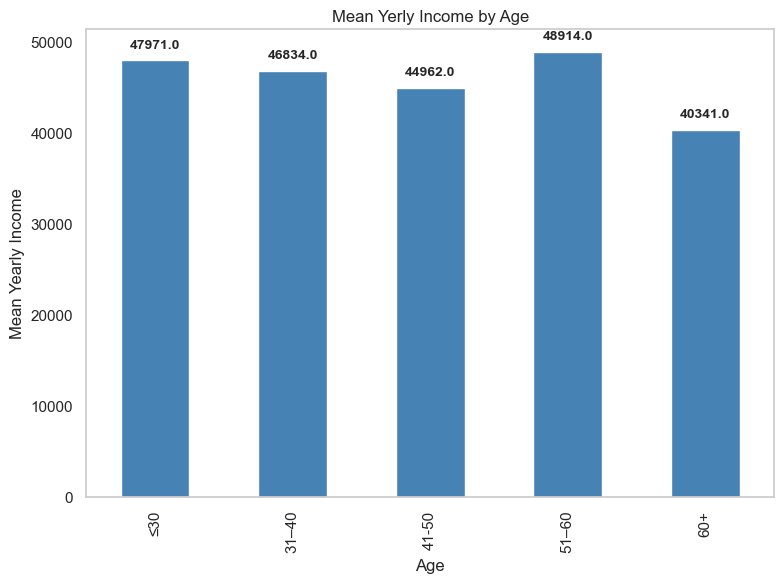

In [ ]:
# Calculate mean income by age
income_means = df.groupby("age_group")["yearly_income"].mean().round(0)
print(income_means)

# Create figure and axis
fig, ax = plt.subplots(figsize=(8,6))

# Plot bar chart
bars = income_means.plot(kind="bar", color="steelblue", ax=ax)

# Customize chart
ax.set_title("Mean Yerly Income by Age")
ax.set_xlabel("Age")
ax.set_ylabel("Mean Yearly Income")
ax.grid(False)
ax.set_facecolor("white")

# Add value labels on top of each bar
for i, v in enumerate(income_means):
    ax.text(i, v + 1000, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit model
model = ols("yearly_income ~ C(age_group)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                    sum_sq      df         F        PR(>F)
C(age_group)  1.903912e+10     4.0  9.150308  2.524990e-07
Residual      1.037753e+12  1995.0       NaN           NaN


In [33]:
# Debt vs Income Scatterplot
df.columns.to_list()


['client-id',
 'current_age',
 'retirement_age',
 'birth_year',
 'birth_month',
 'gender',
 'address',
 'latitude',
 'longitude',
 'per_capita_income',
 'yearly_income',
 'total_debt',
 'credit_score',
 'num_credit_cards',
 'age_group',
 'age_group_order']

<Axes: xlabel='yearly_income', ylabel='total_debt'>

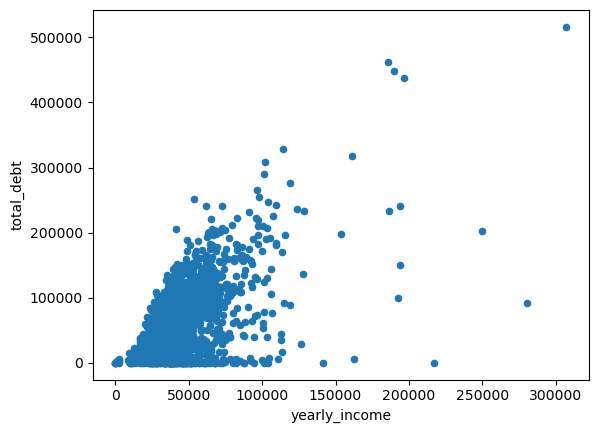

In [34]:
df.plot(kind="scatter", x="yearly_income", y="total_debt")

In [35]:
df.columns.to_list()

['client-id',
 'current_age',
 'retirement_age',
 'birth_year',
 'birth_month',
 'gender',
 'address',
 'latitude',
 'longitude',
 'per_capita_income',
 'yearly_income',
 'total_debt',
 'credit_score',
 'num_credit_cards',
 'age_group',
 'age_group_order']

In [39]:
# Function to compute correlations between two continuous variables
from scipy.stats import pearsonr, spearmanr
def correlation_tests(x, y, data):
    pearson_corr, pearson_p = pearsonr(data[x], data[y])
    spearman_corr, spearman_p = spearmanr(data[x], data[y])
    print(f"{x} vs {y}")
    print(f"  Pearson r = {pearson_corr:.3f}, p = {pearson_p:.4f}")
    print(f"  Spearman ρ = {spearman_corr:.3f}, p = {spearman_p:.4f}\n")

# Run tests for pairs of variables
pairs = [("yearly_income", "total_debt"), ("yearly_income", "age_group_order"), ("yearly_income", "num_credit_cards"),
         ("total_debt", "age_group_order")]

for x, y in pairs:
    correlation_tests(x, y, df)


yearly_income vs total_debt
  Pearson r = 0.551, p = 0.0000
  Spearman ρ = 0.479, p = 0.0000

yearly_income vs age_group_order
  Pearson r = -0.092, p = 0.0000
  Spearman ρ = -0.156, p = 0.0000

yearly_income vs num_credit_cards
  Pearson r = -0.033, p = 0.1416
  Spearman ρ = -0.056, p = 0.0126

total_debt vs age_group_order
  Pearson r = -0.257, p = 0.0000
  Spearman ρ = -0.306, p = 0.0000



In [44]:
df["age_group"].value_counts()

age_group
≤30      520
60+      430
41-50    380
31–40    345
51–60    325
Name: count, dtype: int64

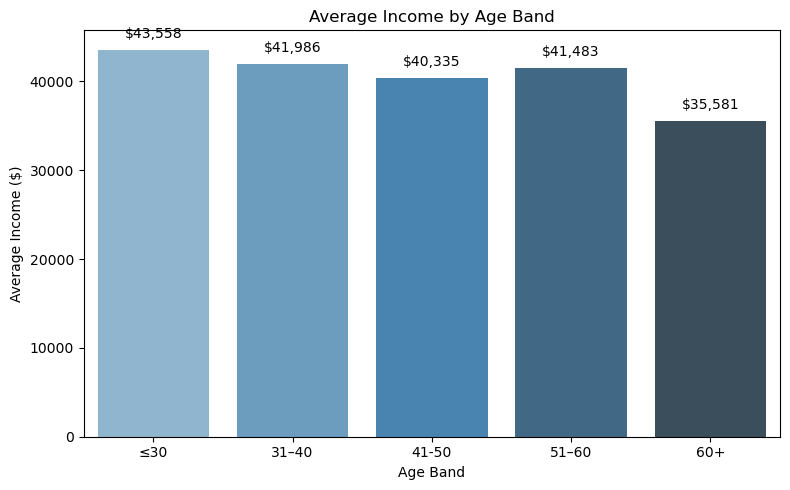

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example: assume df has columns 'age_group' and 'yearly_income'
# Step 1: aggregate to get average income per age band
income_by_band = df.groupby("age_group")["yearly_income"].median().reset_index()

# Step 2: plot the aggregated data
plt.figure(figsize=(8,5))
sns.barplot(data=income_by_band, x="age_group", y="yearly_income", palette="Blues_d")

# Step 3: add value labels
for i, val in enumerate(income_by_band["yearly_income"]):
    plt.text(i, val + 1000, f"${val:,.0f}", ha="center", va="bottom", fontsize=10)

plt.title("Average Income by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Average Income ($)")
plt.tight_layout()
plt.show()


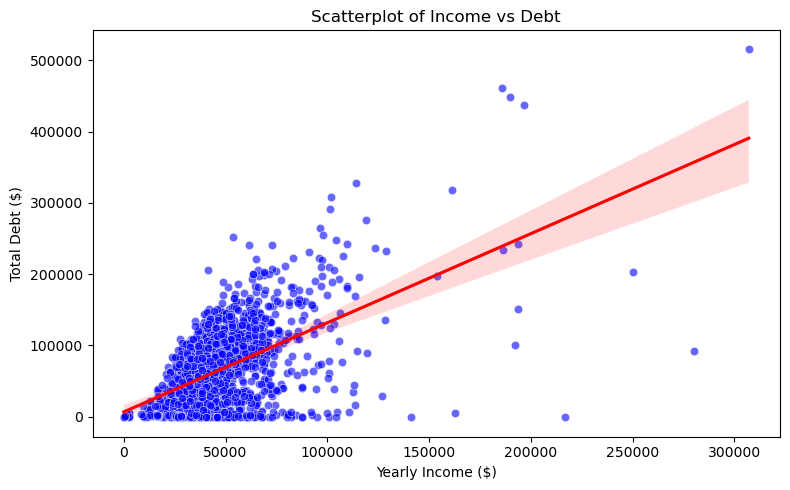

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: assume df has columns 'total_debt' and 'yearly_income'

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, y="total_debt", x="yearly_income", color="blue", alpha=0.6)

# Optional: add regression line to show trend
sns.regplot(data=df, y="total_debt", x="yearly_income", scatter=False, color="red")

plt.title("Scatterplot of Income vs Debt")
plt.ylabel("Total Debt ($)")
plt.xlabel("Yearly Income ($)")
plt.tight_layout()
plt.show()

